In [0]:
import tensorflow as tf

In [0]:
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [12]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [0]:
x_train = x_train.reshape(60000,28,28,1)

In [0]:
x_test = x_test.reshape(10000,28,28,1)

In [0]:
i = tf.keras.layers.Input(shape = x_train[0].shape)
x = tf.keras.layers.Conv2D(32,  kernel_size = (3, 3), strides = 2, activation = "relu", padding = "same")(i)
x = tf.keras.layers.Conv2D(64,  kernel_size = (3, 3), strides = 2, activation = "relu", padding = "same")(x)
x = tf.keras.layers.Conv2D(128,  kernel_size = (3, 3), strides = 2, activation = "relu", padding = "same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dense(10, activation = "softmax")(x)
model = tf.keras.models.Model(i, x)


In [0]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [26]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4361 - accuracy: 0.8474 - val_loss: 0.3615 - val_accuracy: 0.8654
Epoch 2/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2923 - accuracy: 0.8929 - val_loss: 0.3692 - val_accuracy: 0.8641


[[701   1  11  34   0   3 249   0   1   0]
 [  3 976   0  11   3   0   7   0   0   0]
 [  8   1 820   8  19   0 144   0   0   0]
 [  6  13   3 910  18   0  48   0   2   0]
 [  0   0 199  36 578   0 186   0   1   0]
 [  0   0   0   0   0 973   0  21   0   6]
 [ 51   1  56  32  13   1 841   0   5   0]
 [  0   0   0   0   0  15   0 961   0  24]
 [  0   0   1   2   2   9  47   6 933   0]
 [  0   0   0   0   0  16   1  35   0 948]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1000
           1       0.98      0.98      0.98      1000
           2       0.75      0.82      0.78      1000
           3       0.88      0.91      0.90      1000
           4       0.91      0.58      0.71      1000
           5       0.96      0.97      0.96      1000
           6       0.55      0.84      0.67      1000
           7       0.94      0.96      0.95      1000
           8       0.99      0.93      0.96      1000
           9       0.97     

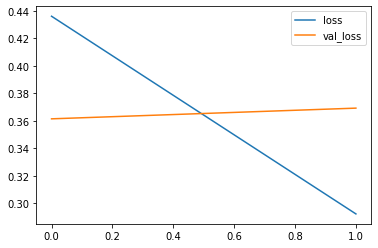

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, np.argmax(model.predict(x_test),axis=-1)))
print(classification_report(y_test, np.argmax(model.predict(x_test),axis=-1)))

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

Model history is a straight line and doesn't contain much information because the model ran for 2 epochs


In [43]:
misclassified_images = np.where(y_test!= np.argmax(model.predict(x_test),axis=-1))[0]
misclassified_images.shape

(1359,)

In [66]:
randi= np.random.choice(misclassified_images)
print(randi)
len(y_test)

1863


10000

Text(0.5, 1.0, 'True label 4, Predicted Label 2')

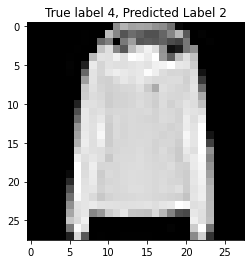

In [67]:
plt.imshow(x_test[randi].reshape(28,28), cmap = 'gray')
plt.title(f"True label {y_test[randi]}, Predicted Label {np.argmax(model.predict(x_test), axis=-1)[randi]}")